In [5]:
import requests
import json
import pandas as pd

In [17]:
#Question 1 
def Counts(input_str):
    words=input_str.split() #splitting the input string 
    
    word_counts={} #storing the words & their counts in the dictionary 
    
    for word in words:
        if word in word_counts:
            word_counts[word]+=1 
        else:
            word_counts[word] =1
            
    max_freq=max(word_counts.values()) #assigning the maximum value of the words
    
  
    highest_freq_word=[word for word in word_counts if word_counts[word] == max_freq] #checking for the word which has
                                                                                    #maximum length
    
    result=[(word,len(word)) for word in highest_freq_word] #Displaying the result 
    return result

#Additional Test Cases

#"ineuron ineuron ineuron is a great great platform for learning the technologies"

#Explanation
#From the given string we can say that the most frequent words are ineuron & great and the maximum value from both the values 
#is ineuron and its corresponding length is 7


#"Data data data is the new new oil"

#Explanation 
#From the given string the most frequent words is data & new and the maximum values from both the values is data & its
#corresponding length is 4


In [23]:
#Question 2

from collections import Counter

def str_valid(s):
    #Count the frequency of each character 
    char_freq=Counter(s)
    
    #Find the maximum frequency
    max_values=max(char_freq.values())
    
    # Step 3: Count the number of characters with different frequencies
    diff_freq=sum(freq != max_values for freq in char_freq.values())
    
    #Check conditons for validation
    if diff_freq <= 1:
        return "Yes the string is valid"
    
    #if removing one char makes the string valid 
    for char in char_freq.keys():
        #Removing the current character
        new_freq=char_freq.copy()
        new_freq[char] -=1 
        new_freq=list(new_freq.values())
        
        diff_freq=sum(freq != max_values for freq in char_freq.values())
        
        if diff_freq <=1:
            return "Yes the String is valid"
        
    else:
        return "No the string is not valid"
    
    

In [27]:
#Additional test cases

("aaabbb") #Valid as occurences of a and b are same
("aabbccc") #Valid by removing the occurence of c one time

'Yes the string is valid'

In [6]:
#Question 3
#URl of pokemon data 
url="https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

#Send GET requests to the url and get response 
response=requests.get(url)

#Check if the request was successful 
if response.status_code == 200:
    #Convert response text to json 
    data=json.loads(response.text)
    
    #Convert Json to Pandas DataFrame
    df1=pd.DataFrame(data)
    
    #SAving DataFrame as Excel file
    df1.to_excel("pokemon_data.xlsx",index=False)


In [5]:
#Question 4

# URL of the NASA data
url = 'https://data.nasa.gov/resource/y77d-th95.json'

# Send GET request to the URL and get the response
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert response text to JSON
    data = json.loads(response.text)

    # Convert JSON to a Pandas dataframe
    df = pd.DataFrame(data)

    # Save dataframe as a CSV file
    df.to_csv('nasa_data.csv', index=False)

In [3]:
#Question 5

import pandas as pd
import requests

# API URL
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(url)

# Extract the JSON data from the response
data = response.json()

# Extract the show data
show_data = {
    'id': data['id'],
    'url': data['url'],
    'name': data['name'],
    'type': data['type'],
    'language': data['language'],
    'genres': ', '.join(data['genres']),
    'status': data['status'],
    'runtime': data['runtime'],
    'averageRuntime': data['averageRuntime'],
    'premiered': data['premiered'],
    'ended': data['ended'],
    'officialSite': data['officialSite'],
    'scheduleTime': data['schedule']['time'],
    'scheduleDays': ', '.join(data['schedule']['days']),
    'rating': data['rating']['average'],
    'weight': data['weight'],
    'network': data['network']['name'],
    'country': data['network']['country']['name'],
    'timezone': data['network']['country']['timezone'],
    'imageMedium': data['image']['medium'],
    'imageOriginal': data['image']['original'],
    'summary': data['summary'],
    'updated': data['updated']
}

# Create a DataFrame from the show data
df_show = pd.DataFrame(show_data, index=[0])

# Extract the episode data
episode_data = []
for episode in data['_embedded']['episodes']:
    episode_info = {
        'id': episode['id'],
        'url': episode['url'],
        'name': episode['name'],
        'season': episode['season'],
        'number': episode['number'],
        'type': episode['type'],
        'airdate': episode['airdate'],
        'airtime': episode['airtime'],
        'airstamp': episode['airstamp'],
        'runtime': episode['runtime'],
        'rating': episode['rating']['average'],
        'imageMedium': episode['image']['medium'],
        'imageOriginal': episode['image']['original'],
        'summary': episode['summary']
    }
    episode_data.append(episode_info)

# Create a DataFrame from the episode data
df_episodes = pd.DataFrame(episode_data)

# Save the show data to a CSV file
df_show.to_csv('westworld_show.csv', index=False)

# Save the episode data to a CSV file
df_episodes.to_csv('westworld_episodes.csv', index=False)

In [10]:
#Question 6

dataset=pd.read_json("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")

In [11]:
df=pd.json_normalize(dataset['pokemon']) #Converting the json data into tabular form

In [12]:
df.head() #Displaying the top 5 data 

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [6]:
df.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution'],
      dtype='object')

In [13]:
#Get all Pokemons whose spawn rate is less than 5%

df_spawn_rate=df[df["spawn_chance"] < 0.05]

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt

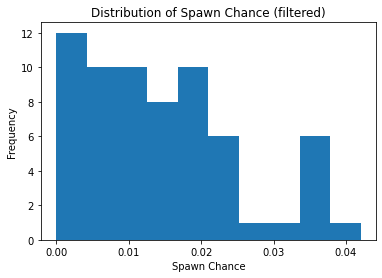

In [16]:
#Visualizing th code

plt.hist(df_spawn_rate["spawn_chance"], bins=10)
plt.xlabel("Spawn Chance")
plt.ylabel("Frequency")
plt.title("Distribution of Spawn Chance (filtered)")
plt.show()

In [17]:
#Get all Pokemons that have less than 4 weaknesses


df[df["weaknesses"].apply(len) < 4]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,None,"[Water, Electric, Rock]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
6,7,007,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,[2.1],"[Electric, Grass]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN
7,8,008,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"[Electric, Grass]","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Water, Electric, Rock]",NaN,NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.8399999999999999]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


In [18]:
#Visualizing the weakness

filter_data=df[df["weaknesses"].apply(len) < 4] 

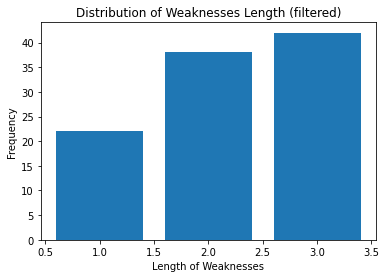

In [19]:
length_counts = filter_data["weaknesses"].apply(len).value_counts()

# Visualize the length distribution using a bar chart
plt.bar(length_counts.index, length_counts.values)
plt.xlabel("Length of Weaknesses")
plt.ylabel("Frequency")
plt.title("Distribution of Weaknesses Length (filtered)")
plt.show()

In [20]:
#Get all Pokemons that have no multipliers at all


df[df["multipliers"] == 0]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution


In [ ]:
#Get all Pokemon who have more than two types of capabilities

df[df["type"].apply(len) > 2] #capabilities

In [22]:
df.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution'],
      dtype='object')

In [34]:
# Get all Pokemons whose spawn time is less than 300 seconds.

df_spawn_time=df[df['spawn_time']<'05:00']

In [20]:
#Questions 7

data=pd.read_csv("nasa_data.csv")
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [21]:
# Get all the Earth meteorites that fell before the year 200

data[(data["fall"] == "Fell") & (data["year"] <= "2000")]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.50000,35.20000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",NaN,NaN
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the meteorite data from a CSV file
meteorite_data = pd.read_csv('nasa_data.csv')

# Convert the year column to datetime format
meteorite_data['year'] = pd.to_datetime(meteorite_data['year'], errors='coerce')

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = meteorite_data[(meteorite_data['reclat'] != 0) & (meteorite_data['reclong'] != 0) & (meteorite_data['year'] < '2000-01-01')]

# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = meteorite_data[(meteorite_data['reclat'] != 0) & (meteorite_data['reclong'] != 0) & (meteorite_data['year'] < '1970-01-01')]

# Plotting the coordinates of meteorites that fell before 1970
plt.figure(figsize=(8, 6))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], marker='o', color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Coordinates (Before 1970)')
plt.grid(True)
plt.show()

# Additional insights can be derived by performing further analysis on the data

In [22]:
# Convert the year column to datetime format
data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [23]:
# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = data[(data['reclat'] != 0) & (data['reclong'] != 0) & (data['year'] < '1970-01-01')]

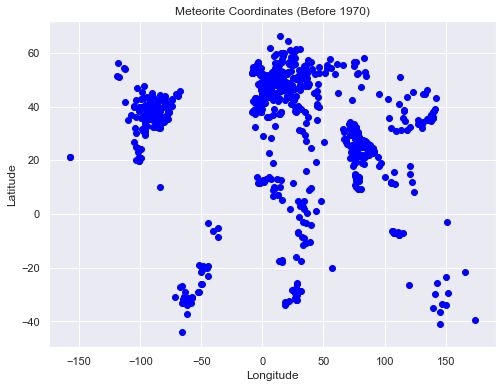

In [24]:
# Plotting the coordinates of meteorites that fell before 1970
plt.figure(figsize=(8, 6))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], marker='o', color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Coordinates (Before 1970)')
plt.grid(True)
plt.show()

In [41]:
#Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
#than 10000kg

df_copy=data[data["mass"] > 10000]

In [42]:
len_counts=data[data["mass"] > 10000].apply(len).value_counts() #getting the len of the mass greater than 10k kg

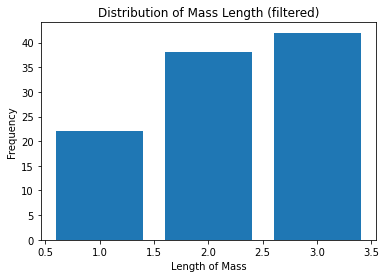

In [43]:
#visualizig the len 

plt.bar(length_counts.index, length_counts.values)
plt.xlabel("Length of Mass")
plt.ylabel("Frequency")
plt.title("Distribution of Mass Length (filtered)")
plt.show()

In [4]:
#Question 8
data=pd.read_csv('westworld_episodes.csv')
data.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,imageMedium,imageOriginal,summary
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>A woman named Dolores is a free spirit in t...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard suspects that someone is sabotaging...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard continues to investigate Dolores' s...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While Dolores joins William and Logan on th...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Dolores takes the first step on her path of...


In [5]:
#Get all the overall ratings for each season and using plots compare the ratings for all the
#seasons, like season 1 ratings, season 2, and so on
filtered_data = data.loc[data['season'].isin([1, 2, 3, 4]), ['season', 'rating']]


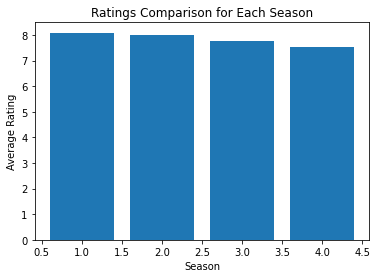

In [6]:
import matplotlib.pyplot as plt

# Group the data by season and calculate the mean rating for each season
season_ratings = data.groupby('season')['rating'].mean()

# Create a bar plot to compare the ratings for each season
plt.bar(season_ratings.index, season_ratings.values)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Ratings Comparison for Each Season')
plt.show()


In [7]:
#Get all the episode names, whose average rating is more than 8 for every season
data[(data['rating'] > 8.0) & (data['name'])]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,imageMedium,imageOriginal,summary
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While William and Dolores travel to the unc...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard forces Robert to take him back into...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Delores finds out the truth about William's...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Another of Westworld's Host revolutionaries...
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,21:00,2018-06-18T01:00:00+00:00,60,8.4,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>The Man learns that his grip on reality isn...
19,1459790,https://www.tvmaze.com/episodes/1459790/westwo...,The Passenger,2,10,regular,2018-06-24,21:00,2018-06-25T01:00:00+00:00,90,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,"<p>The Man faces a personal reckoning, while A..."


In [8]:
#Get all the episode names that aired before May 2019
data[(data['airdate'] <= '2019-05') & (data['name'])]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,imageMedium,imageOriginal,summary
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>A woman named Dolores is a free spirit in t...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard suspects that someone is sabotaging...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard continues to investigate Dolores' s...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While Dolores joins William and Logan on th...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Dolores takes the first step on her path of...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,"<p>While Maeve convinces Felix to show her ""up..."
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While William and Dolores travel to the unc...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard tries to cope with what he did unde...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard forces Robert to take him back into...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Delores finds out the truth about William's...


In [9]:
#Get the episode name from each season with the highest and lowest rating

Rate_Max=max(data['rating']) #getting the highest rating from the rating feature
Rate_Min=min(data['rating']) ##getting the lowest rating from the rating feature

#Episode name from each season with the highest rating 
data[(data['season'].isin([1,2,3,4])) & (data['name']) & (data['rating'] == Rate_Max)] 



,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,imageMedium,imageOriginal,summary
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Delores finds out the truth about William's...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Another of Westworld's Host revolutionaries...


In [10]:
#Episode name from each season with the lowest rating 
data[(data['season'].isin([1,2,3,4])) & (data['name']) & (data['rating'] == Rate_Min)] 

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,imageMedium,imageOriginal,summary
28,2326389,https://www.tvmaze.com/episodes/2326389/westwo...,The Auguries,4,1,regular,2022-06-26,21:00,2022-06-27T01:00:00+00:00,55,7.1,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Hello again. Don't worry about a thing. It'...


In [11]:

#Get the episode name from each season with the highest and lowest rating

#combining the both from each season with the highest and lowest rating as per question
data[(data['season'].isin([1,2,3,4])) & (data['name']) & (data['rating'] == Rate_Max) | (data['rating'] == Rate_Min)] 

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,imageMedium,imageOriginal,summary
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Delores finds out the truth about William's...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Another of Westworld's Host revolutionaries...
28,2326389,https://www.tvmaze.com/episodes/2326389/westwo...,The Auguries,4,1,regular,2022-06-26,21:00,2022-06-27T01:00:00+00:00,55,7.1,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Hello again. Don't worry about a thing. It'...


In [12]:
# Get the summary for the most popular ( ratings ) episode in every season

mean_rating = data['rating'].mean()
data[(data['season'].isin([1, 2, 3, 4])) & (data['name'].notnull()) & (data['summary'].notnull()) & (data['rating'] > mean_rating)]


,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,imageMedium,imageOriginal,summary
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>A woman named Dolores is a free spirit in t...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While Dolores joins William and Logan on th...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Dolores takes the first step on her path of...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,"<p>While Maeve convinces Felix to show her ""up..."
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While William and Dolores travel to the unc...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard tries to cope with what he did unde...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard forces Robert to take him back into...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Delores finds out the truth about William's...
13,1440917,https://www.tvmaze.com/episodes/1440917/westwo...,The Riddle of the Sphinx,2,4,regular,2018-05-13,21:00,2018-05-14T01:00:00+00:00,71,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>William pays his recuperating father-in-law...
16,1459961,https://www.tvmaze.com/episodes/1459961/westwo...,Les Écorchés,2,7,regular,2018-06-03,21:00,2018-06-04T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Charlotte and Bernard review Bernard's memo...


In [6]:
#Question 9

df2=pd.read_csv("Tesla.csv")

In [7]:
df2.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df2.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
#Get all the cars and their types that do not qualify for clean alternative fuel vehicle

df2[(df2["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] !=  "Clean Alternative Fuel Vehicle Eligible") & (df2["Model"]) & (df2["Electric Vehicle Type"]) ]


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
6,3FA6P0PU1G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
7,WA1F2AFY8P,Thurston,Lacey,WA,98516.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
8,1FADP5CU0E,Thurston,Rochester,WA,98579.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20.0,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,5.306701e+10
11,7SAYGDEF4N,Yakima,Yakima,WA,98908.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,187486883,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
14,1FADP5FU4H,Thurston,Lacey,WA,98513.0,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22.0,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130437,WBA13AG06M,Thurston,Olympia,WA,98501.0,2021,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,22.0,196559310,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [9]:
# Get all the cars that have an electric range of more than 100, and were made after
2015

df2[(df2["Electric Range"]> 100) & (df2["Model Year"] >= 2015)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130418,5YJSA1E22F,King,Vashon,WA,98070.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,34.0,279480883,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


In [10]:
# Get all the cars that have an electric range of more than 100, and were made after
2015

df2[(df2["Electric Range"]> 100) & (df2["Model Year"] >= 2015)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130418,5YJSA1E22F,King,Vashon,WA,98070.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,34.0,279480883,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


In [49]:
#Get all TESLA cars with the model year, and model type made in Bothell City.


df2[(df2["City"] == "Bothell") & (df2["Model"]) & (df2["Model Year"]) & (df2["Electric Vehicle Type"])]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
56,1N4BZ0CPXH,Snohomish,Bothell,WA,98021.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,1.0,102295259,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
292,5YJXCBE40H,King,Bothell,WA,98011.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,1.0,229900653,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
430,WA1F2AFY8M,King,Bothell,WA,98011.0,2021,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,1.0,154782400,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
450,1FADP5EU6H,King,Bothell,WA,98011.0,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,1.0,282612431,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
495,5YJYGDEE3M,Snohomish,Bothell,WA,98012.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,179049615,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129602,WAUSPBFFXH,Snohomish,Bothell,WA,98021.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,1.0,216806670,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
129665,5YJSA1CG9D,Snohomish,Bothell,WA,98021.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,1.0,195436111,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
129778,5YJ3E1EB3K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,176326356,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
129954,5YJ3E1EB3M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,137418676,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

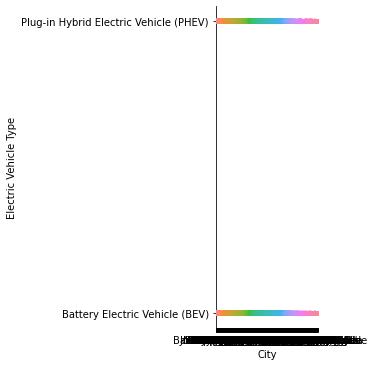

In [12]:
#Draw plots to show the distribution between city and electric vehicle type

sns.catplot(x="City",y="Electric Vehicle Type",data=df2)
plt.show()

<AxesSubplot:xlabel='Electric Vehicle Type', ylabel='count'>

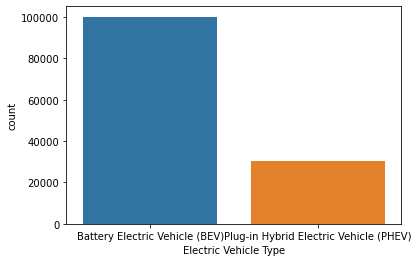

In [13]:
sns.countplot(x='Electric Vehicle Type',data=df2)

In [16]:
df2['City'].value_counts()

Seattle           22894
Bellevue           6748
Redmond            4820
Vancouver          4652
Kirkland           4071
                  ...  
Middletown            1
Virginia Beach        1
Newark                1
Fort Wayne            1
Little Elm            1
Name: City, Length: 656, dtype: int64

In [17]:
df2['City'].unique()

array(['Yakima', 'Poulsbo', 'Seattle', 'Lacey', 'Olympia', 'Tumwater',
       'Rochester', 'Bremerton', 'Bainbridge Island', 'Everett',
       'Leavenworth', 'Mill Creek', 'Snohomish', 'Mount Vernon',
       'Arlington', 'Lake Stevens', 'Burlington', 'Anacortes', 'Edmonds',
       'Bothell', 'Sultan', 'Spokane', 'Pullman', 'Yelm', 'Port Orchard',
       'Palouse', 'Monroe', 'Marysville', 'Mukilteo', 'Brier', 'Lynnwood',
       'Kettle Falls', 'Orondo', 'Selah', 'Oak Harbor', 'Clinton',
       'Cheney', 'Granite Falls', 'Renton', nan, 'Walla Walla',
       'Freeland', 'Kent', 'Redmond', 'Vancouver', 'Tukwila',
       'Federal Way', 'Kirkland', 'Bellevue', 'Battle Ground', 'Duvall',
       'Brush Prairie', 'Sammamish', 'Burien', 'Auburn', 'Bingen',
       'Camas', 'Issaquah', 'Shoreline', 'Covington', 'Woodinville',
       'Longview', 'Olalla', 'Normandy Park', 'Port Townsend',
       'North Bend', 'Seabeck', 'Medina', 'Maple Valley', 'Newcastle',
       'Des Moines', 'Ridgefield', 'Wash

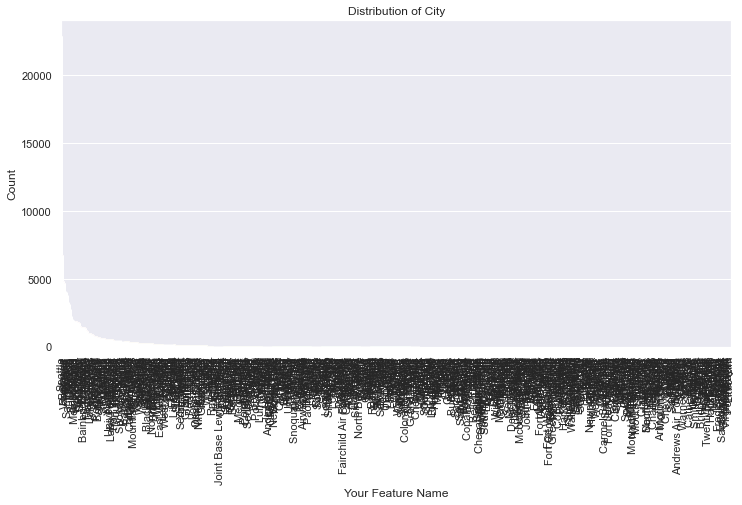

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x="City", order=df2["City"].value_counts().index)
plt.xlabel("Your Feature Name")
plt.ylabel("Count")
plt.title("Distribution of City")
plt.xticks(rotation=90)
plt.show()


In [111]:
#Question 10

def count_pos(text):
    # Initialize counts
    counts = {
        'verbs': 0,
        'nouns': 0,
        'pronouns': 0,
        'adjectives': 0
    }
    
    # Split text into words
    words = text.split()
    
    # Count the number of verbs, nouns, pronouns, and adjectives
    for word in words:
        # Check if the word ends with common suffixes for each part of speech
        if word.endswith(('ing', 's', 'ed')):
            counts['verbs'] += 1
        elif word.endswith(('s', 'es')):
            counts['nouns'] += 1
        elif word.lower() in ('i', 'you', 'he', 'she', 'it', 'we', 'they'):
            counts['pronouns'] += 1
        elif word.endswith(('y', 'ful', 'able', 'ible')):
            counts['adjectives'] += 1
    
    return counts

# Example usage
text = "I like to eat apples. They are delicious and healthy."
pos_counts = count_pos(text)
print(pos_counts

{'verbs': 1, 'nouns': 0, 'pronouns': 2, 'adjectives': 0}


In [ ]:
#Additional test cases

#The dog  barks  loudly  when it sees strangers
#In this sentence, "barks" is the verb, "dog" is the noun, "it" is the pronoun

#"I  ate  a delicious  slice of pizza  for lunch."
#In this sentence, "ate" is the verb, "slice" is the noun, "I" is the pronoun, and "delicious" is the adjective.
